In [397]:
from matplotlib import pyplot as plt
import numpy as np

In [430]:
from random import shuffle

def gen(n, k):
    l = list(range(n))

    for i in range(n - k + 1):
        z = l[i:i+k]
        shuffle(z)
        l = l[:i] + z + l[i+k:]

    return l

def diffs(p):
    pinv = [0] * len(p)
    for i in range(len(p)):
        pinv[p[i]] = i
    return [pinv[i]-i for i in range(len(p))]

In [389]:
def avg(l):
    return sum(l) / len(l)

def max2(l):
    return sorted(l)[-2]

def try_solve(p):
    d = diffs(p)
    if d.count(0) == len(d):
        return 1
    
    cnts = [d.count(i) for i in range(max(d))]

    # for i in range(2, min(len(cnts), len(p) // 20 + 1)):
    #     if max(cnts[i:]) <= cnts[0]:
    #         return i
    
    # return len(p) // 20

    return max(-max([((avg(cnts[:i]) - avg(cnts[i:])), -i) for i in range(cnts.index(max(cnts)), max(d) - 1)])[1], 2)
    # return -max([(l[i][0] / (l[i-1][0] + 1), l[i][1]) for i in range(1, len(l))])[1]
    
    # return max(-max([((avg(cnts[:i]) - avg(cnts[i:])), -i) for i in range(1, max(d) - 1)])[1], 2)

In [395]:
from random import randint
from tqdm import tqdm

ar = []

def inf():
    while True:
        yield

for _ in tqdm(inf()):
    n = randint(40, 1000)
    k = randint(1, n // 20)
    ar = gen(n, k)
    if try_solve(ar) != k:
        print("PROLAPS")
        print(n)
        print(k)
        print(try_solve(ar))
        break

114it [00:00, 114.94it/s]

PROLAPS
371
16
14


In [400]:
def show(ar, bins=None):
    plt.hist(diffs(ar), bins or list(range(min(diffs(ar)), max(diffs(ar)) + 1)))

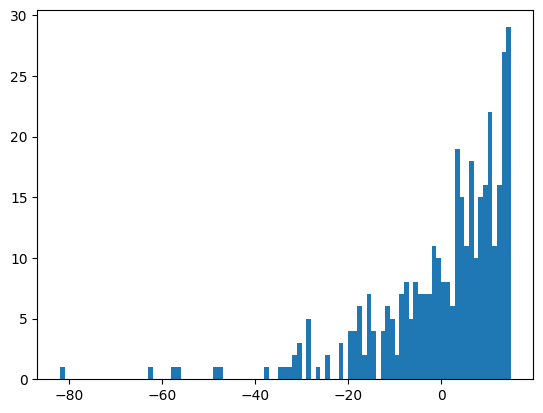

In [401]:
show(ar)

In [388]:
try_solve(ar)

9

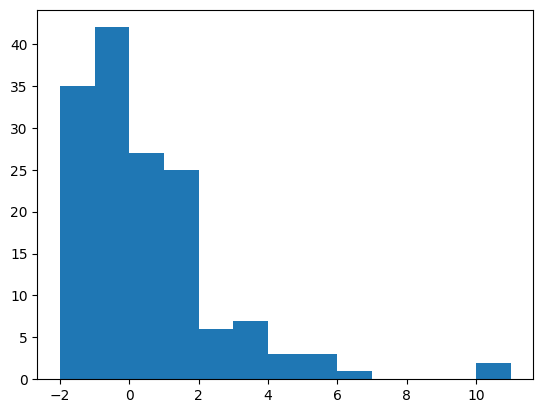

In [435]:
show(gen(151, 3))

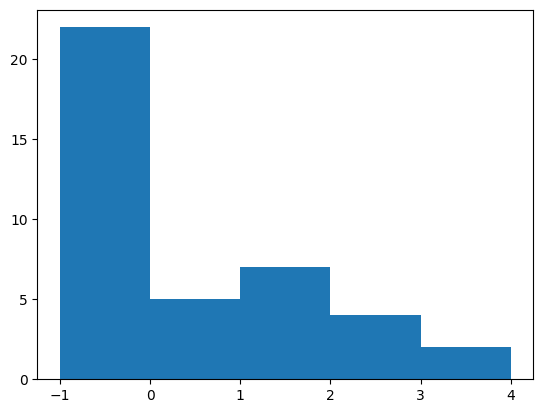

In [436]:
test = [1, 2, 3, 0, 5, 4, 7, 8, 6, 10, 9, 11, 13, 12, 14, 16, 17, 15, 18, 19, 20, 22, 21, 24, 25, 23, 27, 26, 29, 28, 31, 32, 30, 34, 35, 36, 37, 33, 39, 38]

show(test)